In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import torch
from torch.utils.data import TensorDataset, DataLoader
torch.set_default_device('cpu')

import numpy as np
import matplotlib.pyplot as plt
from transformers_simple.cnn import CNN
from transformers_simple.train import Trainer

In [2]:
T = 1000
t = np.linspace(0,4,T)
K = 4*np.pi 
in_size = 20
out_size = 1
kernel_size = 3
hidden_channels = 16
num_layers = 3

epochs = 100
batch_size = 32
log_interval = 4
learning_rate = 1e-4
device = torch.device('cpu')

In [3]:
net = CNN(input_length=in_size, input_channels=1, output_size=out_size, 
          hidden_channels=hidden_channels, kernel_size=kernel_size, num_layers=num_layers,
         activation=torch.nn.LeakyReLU(0.05))

In [4]:
data = np.sin(K*t) + np.cos(4*K*t)

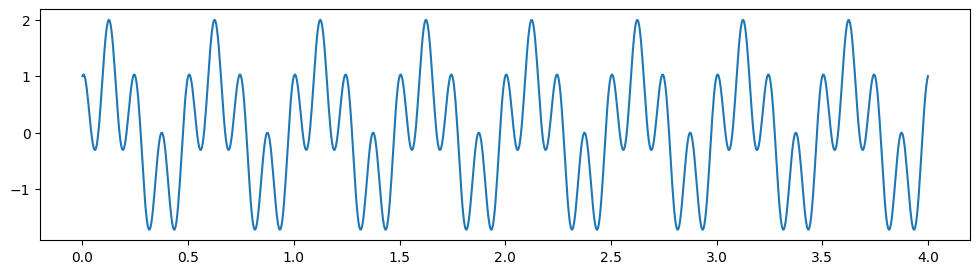

In [5]:
plt.figure(figsize=(12,3))
plt.plot(t,data)
plt.show()

In [6]:
X = np.zeros((T,1,in_size))
Y = np.zeros((T,out_size))

for t in range(in_size+1,T):
    X[t,0] = data[t-in_size:t]
    Y[t] = data[t]

In [7]:
Ns = int(0.5*T)

Xtrain = X[:Ns]
Ytrain = Y[:Ns]

Xtrain = Xtrain[in_size+1:]
Ytrain = Ytrain[in_size+1:]

Xtest = X[Ns:]
Ytest = Y[Ns:]

In [8]:
data_train = TensorDataset(torch.Tensor(Xtrain), torch.Tensor(Ytrain))
data_test = TensorDataset(torch.Tensor(Xtest), torch.Tensor(Ytest))

In [10]:
loss_fn = torch.nn.MSELoss()

In [12]:
trainer = Trainer(
    model=net, dataset=data_train, loss_fn=loss_fn, batch_size=batch_size, learning_rate=learning_rate,
    epochs=epochs, log_interval=log_interval, device=device
)

In [13]:
trainer.run()

Train Epoch: 0 [0/479 (0%)]	Loss: 0.976672
Train Epoch: 0 [128/479 (27%)]	Loss: 1.046857
Train Epoch: 0 [256/479 (53%)]	Loss: 1.179961
Train Epoch: 0 [384/479 (80%)]	Loss: 0.866561
Train Epoch: 1 [0/479 (0%)]	Loss: 0.787389
Train Epoch: 1 [128/479 (27%)]	Loss: 1.109770
Train Epoch: 1 [256/479 (53%)]	Loss: 0.978207
Train Epoch: 1 [384/479 (80%)]	Loss: 1.113719
Train Epoch: 2 [0/479 (0%)]	Loss: 1.322051
Train Epoch: 2 [128/479 (27%)]	Loss: 1.194632
Train Epoch: 2 [256/479 (53%)]	Loss: 0.931465
Train Epoch: 2 [384/479 (80%)]	Loss: 1.093241
Train Epoch: 3 [0/479 (0%)]	Loss: 0.770902
Train Epoch: 3 [128/479 (27%)]	Loss: 1.379627
Train Epoch: 3 [256/479 (53%)]	Loss: 0.806199
Train Epoch: 3 [384/479 (80%)]	Loss: 0.914720
Train Epoch: 4 [0/479 (0%)]	Loss: 0.973275
Train Epoch: 4 [128/479 (27%)]	Loss: 1.080961
Train Epoch: 4 [256/479 (53%)]	Loss: 1.063297
Train Epoch: 4 [384/479 (80%)]	Loss: 1.072044
Train Epoch: 5 [0/479 (0%)]	Loss: 1.031916
Train Epoch: 5 [128/479 (27%)]	Loss: 1.038464
Train 

Train Epoch: 48 [256/479 (53%)]	Loss: 0.013898
Train Epoch: 48 [384/479 (80%)]	Loss: 0.013227
Train Epoch: 49 [0/479 (0%)]	Loss: 0.010348
Train Epoch: 49 [128/479 (27%)]	Loss: 0.013683
Train Epoch: 49 [256/479 (53%)]	Loss: 0.015222
Train Epoch: 49 [384/479 (80%)]	Loss: 0.014295
Train Epoch: 50 [0/479 (0%)]	Loss: 0.010738
Train Epoch: 50 [128/479 (27%)]	Loss: 0.010680
Train Epoch: 50 [256/479 (53%)]	Loss: 0.013840
Train Epoch: 50 [384/479 (80%)]	Loss: 0.013171
Train Epoch: 51 [0/479 (0%)]	Loss: 0.015406
Train Epoch: 51 [128/479 (27%)]	Loss: 0.016175
Train Epoch: 51 [256/479 (53%)]	Loss: 0.011091
Train Epoch: 51 [384/479 (80%)]	Loss: 0.011504
Train Epoch: 52 [0/479 (0%)]	Loss: 0.011072
Train Epoch: 52 [128/479 (27%)]	Loss: 0.010616
Train Epoch: 52 [256/479 (53%)]	Loss: 0.011875
Train Epoch: 52 [384/479 (80%)]	Loss: 0.016171
Train Epoch: 53 [0/479 (0%)]	Loss: 0.013750
Train Epoch: 53 [128/479 (27%)]	Loss: 0.014303
Train Epoch: 53 [256/479 (53%)]	Loss: 0.011333
Train Epoch: 53 [384/479 (80

Train Epoch: 96 [256/479 (53%)]	Loss: 0.007672
Train Epoch: 96 [384/479 (80%)]	Loss: 0.008018
Train Epoch: 97 [0/479 (0%)]	Loss: 0.006407
Train Epoch: 97 [128/479 (27%)]	Loss: 0.008996
Train Epoch: 97 [256/479 (53%)]	Loss: 0.007092
Train Epoch: 97 [384/479 (80%)]	Loss: 0.007622
Train Epoch: 98 [0/479 (0%)]	Loss: 0.005853
Train Epoch: 98 [128/479 (27%)]	Loss: 0.007658
Train Epoch: 98 [256/479 (53%)]	Loss: 0.005398
Train Epoch: 98 [384/479 (80%)]	Loss: 0.006774
Train Epoch: 99 [0/479 (0%)]	Loss: 0.008368
Train Epoch: 99 [128/479 (27%)]	Loss: 0.009674
Train Epoch: 99 [256/479 (53%)]	Loss: 0.006784
Train Epoch: 99 [384/479 (80%)]	Loss: 0.007186


In [14]:
yhat = net(torch.Tensor(Xtest)).data.numpy()[:,0]

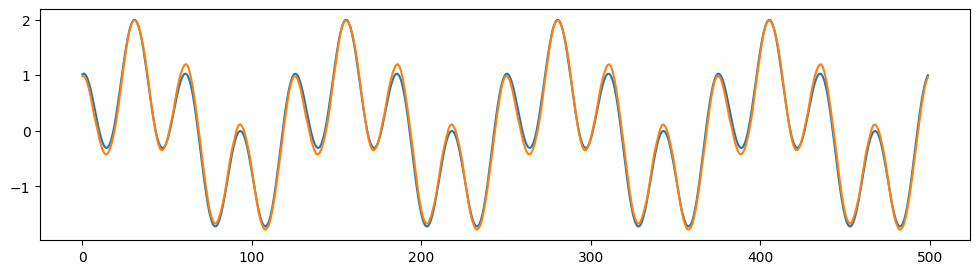

In [15]:
plt.figure(figsize=(12,3))
plt.plot(Ytest[:,0])
plt.plot(yhat)
plt.show()

In [16]:
#autoregressive prediction
yhat = np.zeros((Ns))
x = Xtest[0].copy()
for t in range(Ns):
    yp = net(torch.Tensor(x.reshape((1,1,-1)))).data.numpy()[0,0]
    yp = np.clip(yp,-2,2)
    yhat[t] = yp
    x[0,:-1] = x[0,1:]
    x[0,-1] = yp

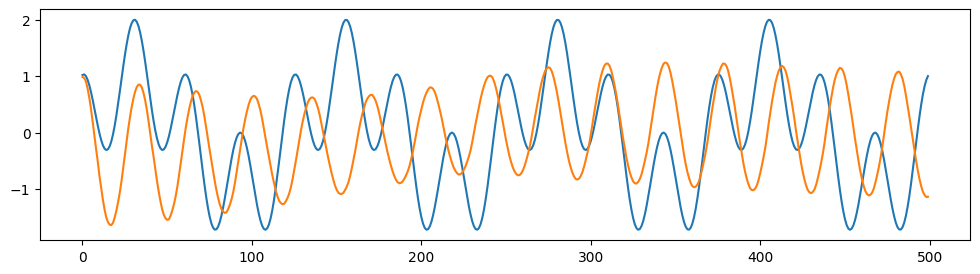

In [17]:
plt.figure(figsize=(12,3))
plt.plot(Ytest)
plt.plot(yhat)
plt.show()

In [18]:
x.shape

(1, 20)